# Importando base de datos

In [1]:
import pandas as pd

In [2]:
pd.read_csv('credit_card.csv', sep = ',')

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
...,...,...,...,...,...,...,...,...
1495,54198,Yes,3.Graduate School,Single,27,295.0780,0.0000,1
1496,45165,No,2.University,Married,55,23637.8555,1144.1800,0
1497,78286,No,3.Graduate School,Single,34,962.9178,962.9178,0
1498,6022,No,2.University,Married,44,864.7592,864.7592,0


In [3]:
datos = pd.read_csv('credit_card.csv')

In [4]:
datos.head()

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         1500 non-null   int64  
 1   CHECKING_ACCOUNT  1500 non-null   object 
 2   EDUCATION         1500 non-null   object 
 3   MARRIAGE          1500 non-null   object 
 4   AGE               1500 non-null   int64  
 5   BILL_AMT          1500 non-null   float64
 6   PAY_AMT           1500 non-null   float64
 7   DEFAULT           1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


# Traduciendo variables

In [6]:
datos.columns

Index(['LIMIT_BAL', 'CHECKING_ACCOUNT', 'EDUCATION', 'MARRIAGE', 'AGE',
       'BILL_AMT', 'PAY_AMT', 'DEFAULT'],
      dtype='object')

In [7]:
dic_columnas = {
    'LIMIT_BAL': 'limite',
    'CHECKING_ACCOUNT': 'cuenta_corriente',
    'EDUCATION': 'escolaridad',
    'MARRIAGE': 'estado_civil',
    'AGE': 'edad',
    'BILL_AMT': 'valor_factura',
    'PAY_AMT': 'valor_pago',
    'DEFAULT': 'moroso'
}

In [8]:
tarjetas = datos.rename(columns = dic_columnas)

In [9]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [10]:
tarjetas.cuenta_corriente.unique()

array(['Yes', 'No'], dtype=object)

In [11]:
dic_cuenta = {
    'Yes': 'Si',
    'No': 'No'
}

In [12]:
# reemplazando Yes -> Si  y No -> No
tarjetas.cuenta_corriente.map(dic_cuenta)

0       Si
1       Si
2       Si
3       Si
4       No
        ..
1495    Si
1496    No
1497    No
1498    No
1499    No
Name: cuenta_corriente, Length: 1500, dtype: object

In [13]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [14]:
tarjetas.cuenta_corriente = tarjetas.cuenta_corriente.map(dic_cuenta)

In [15]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.University,Married,24,934.0122,0.0000,1
1,36132,Si,2.University,Single,26,519.3975,0.0000,1
2,27099,Si,2.University,Single,34,4223.5297,457.0698,0
3,15055,Si,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [16]:
tarjetas.escolaridad.unique()

array(['2.University', '3.Graduate School', '1.High School'], dtype=object)

In [17]:
dic_escolaridad = {
    '2.University': '2.Universidad',
    '3.Graduate School': '3.Pos-graduación',
    '1.High School': '1.Colegio'
}

In [18]:
tarjetas.escolaridad = tarjetas.escolaridad.map(dic_escolaridad)

In [19]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Married,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Single,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Single,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Married,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Single,29,124060.1253,16560.5000,0


In [20]:
tarjetas.estado_civil.unique()

array(['Married', 'Single'], dtype=object)

In [21]:
dic_estado_civil = {
    'Married': 'Casado/a',
    'Single': 'Soltero/a'
}

In [22]:
tarjetas.estado_civil = tarjetas.estado_civil.map(dic_estado_civil)

In [23]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0


In [24]:
# seaborn: biblioteca para la visualizacion estadística de datos
!pip install seaborn

# Importando seaborn

In [25]:
import seaborn as sns

In [26]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: lida, missingno


In [27]:
tarjetas.shape

(1500, 8)

In [28]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0


## Análisis 1

<ipython-input-29-d90da71068f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tarjetas['limite'])


<Axes: xlabel='limite', ylabel='Density'>

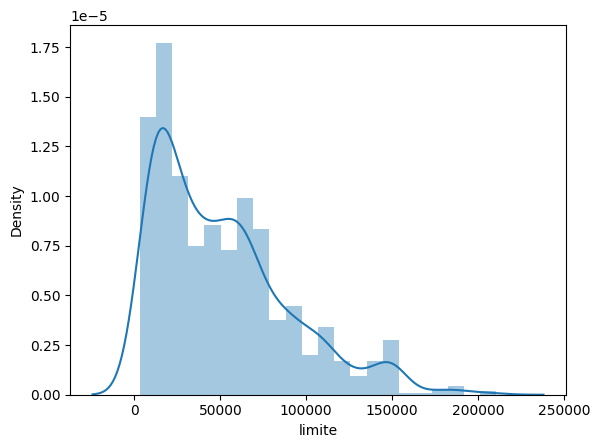

In [29]:
# Gráfico de distribución usando seaborn
sns.distplot(tarjetas['limite'])

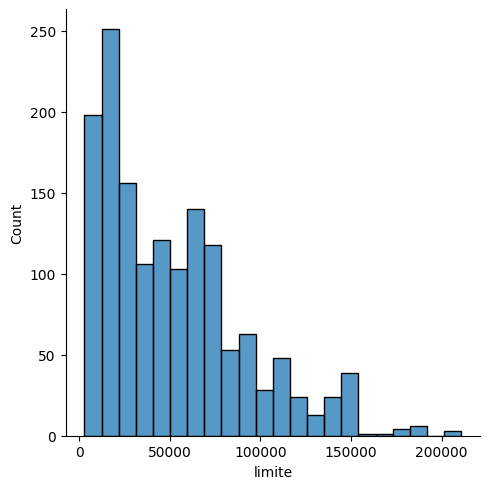

In [30]:
# Gráfico de distribución usando seaborn
sns.displot(data = tarjetas, x = 'limite');

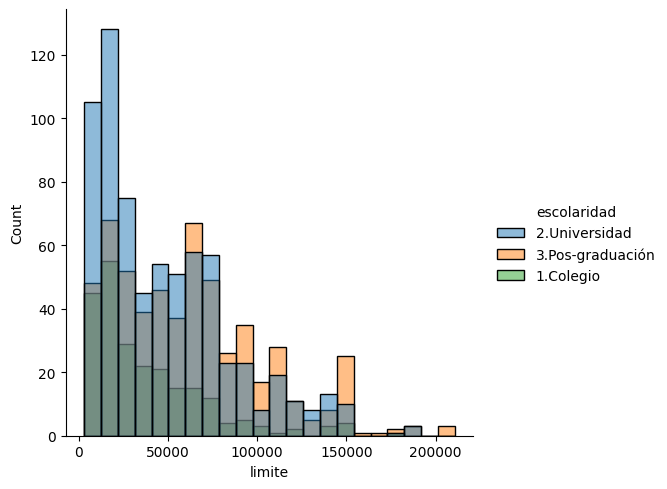

In [31]:
# Gráfico de distribución para la variable de escolaridad a partir del limite
sns.displot(data = tarjetas, x = 'limite', hue = 'escolaridad');

## Análisis 2

In [32]:
# iu: es un nombre cualquiera que representa el porcentaje que la persona usa del limite
tarjetas['iu'] = tarjetas['valor_factura'] / tarjetas['limite']

In [33]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046


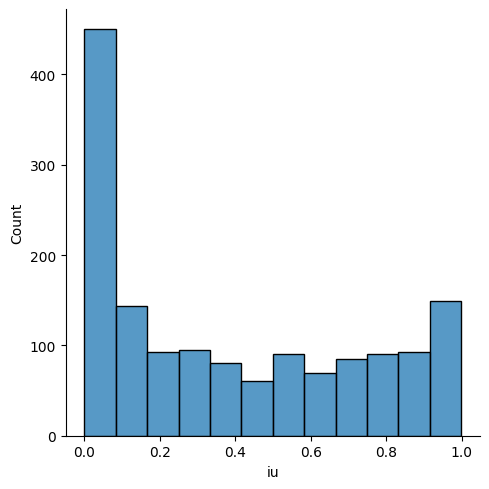

In [34]:
# gráfico de distribución de iu
sns.displot(data = tarjetas, x = 'iu')

Hay cierta cantidad significativa del público que usa poco del límite que tienen disponible

## Ejercicio

In [35]:

datos_de_ventas = {
    'Vendedor' : ['Claudia', 'Gabriel', 'Maria', 'Ignacio', 'Roberto']
    , 'Dia_1' : [10,5,7,6,7]
    , 'Dia_2' : [5,8,10,9,5]
    , 'Dia_3' : [7,6,8,8,6]
}

In [36]:
base = pd.DataFrame(datos_de_ventas)
base

,Vendedor,Dia_1,Dia_2,Dia_3
0,Claudia,10,5,7
1,Gabriel,5,8,6
2,Maria,7,10,8
3,Ignacio,6,9,8
4,Roberto,7,5,6


In [37]:
base['Promedio'] = ((base['Dia_1']+base['Dia_2']+base['Dia_3'])/3).round(2)
base

,Vendedor,Dia_1,Dia_2,Dia_3,Promedio
0,Claudia,10,5,7,7.33
1,Gabriel,5,8,6,6.33
2,Maria,7,10,8,8.33
3,Ignacio,6,9,8,7.67
4,Roberto,7,5,6,6.00


## Estilos y colores

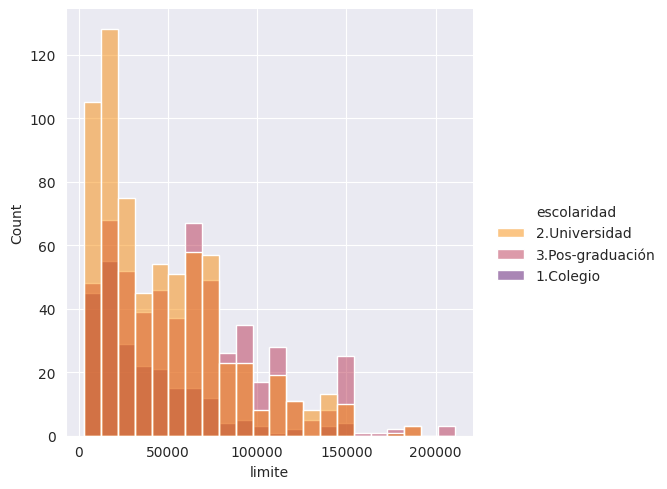

In [38]:
# sns.set_style('whitegrid')
# sns.set_style('white')
sns.set_style('darkgrid')
sns.displot(data = tarjetas, x = 'limite', hue = 'escolaridad', palette = 'inferno_r');
# colores: matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## Análisis de variables categóricas

In [39]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046


<Axes: xlabel='cuenta_corriente', ylabel='count'>

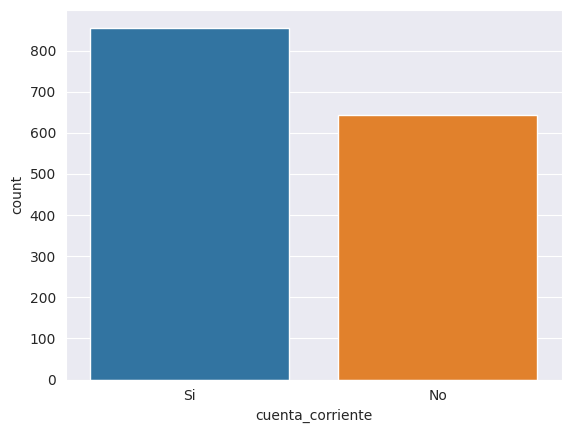

In [40]:
# Gráfico countplot, muestra la cantidad de ocurrencia de los valores de una columna
sns.countplot(x='cuenta_corriente', data=tarjetas)


<Axes: xlabel='cuenta_corriente', ylabel='count'>

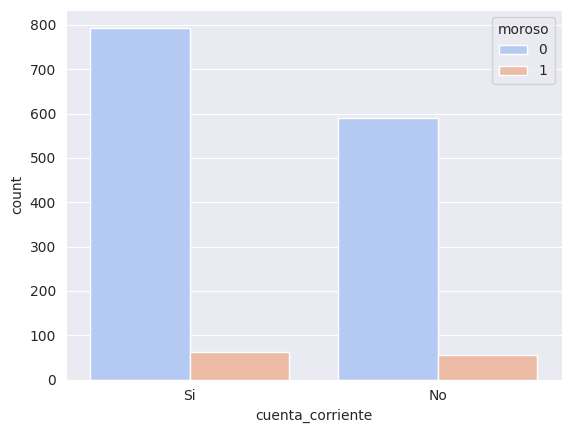

In [41]:
# Gráfico countplot, muestra la cantidad de ocurrencia de los valores de la columna 'cuenta_corriente' e incluye el analisis de la columna 'moroso'
sns.countplot(x='cuenta_corriente', data=tarjetas, hue='moroso', palette='coolwarm')

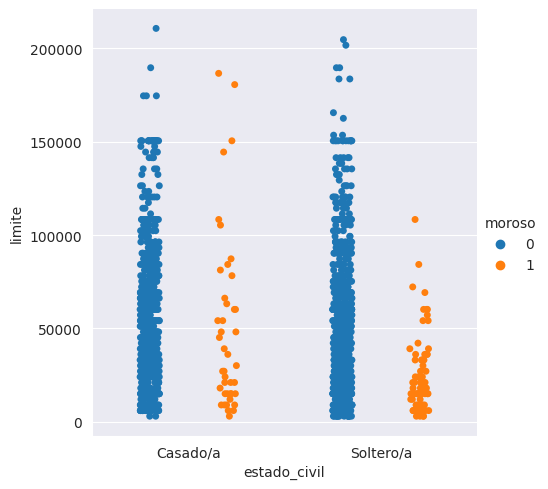

In [42]:
# Gráfico catplot: compara 2 columnas
#  dodge=True : separa lo que indiquemos en hue
sns.catplot(x='estado_civil', y='limite', data=tarjetas, hue='moroso', dodge=True)

*   No hay diferencia significativa entre casados y solteros
*   Las personas morosas casadas tienen más limite que los morosos solteros

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='escolaridad', ylabel='iu'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


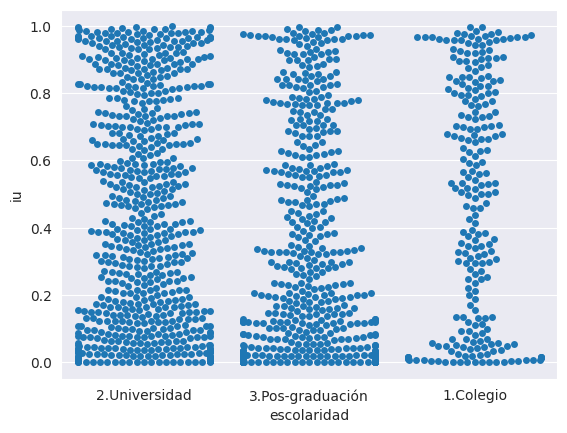

In [43]:
# Gráfico swarmplot: similar a catplot, pero los puntos no se cruzan
# la escolaridad tiene alguna influencia en el porcenjate que gasta del limite (iu) ?
sns.swarmplot(x='escolaridad', y='iu', data=tarjetas)
# hay información que no se muestra porque se superpone, eso indica los UserWarning



*   De las personas en universidad, una gran parte gasta hasta el 20% del limite y otra parte importante gasta el 100%, de forma similar para las persona en Pos-graduación escolaridad
*   Las personas en colegio tienen 2 picos, donde una parte gasta casi el 0% y otra también en gran cantidad gasta cerca del 100%



<Axes: xlabel='escolaridad', ylabel='iu'>

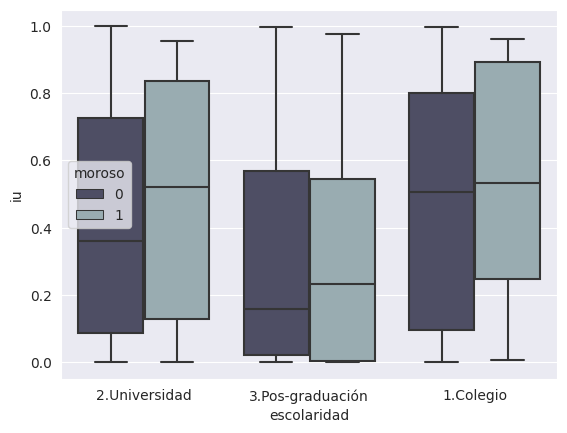

In [44]:
# Gráfico boxplot
sns.boxplot(x='escolaridad', y='iu', data=tarjetas, hue='moroso', palette='bone')



*   A medida que sube la escolaridad de la persona su iu se reduce
*   Las personas morosas en promedio usan más el limite de su tarjeta de crédito



<Axes: xlabel='escolaridad', ylabel='iu'>

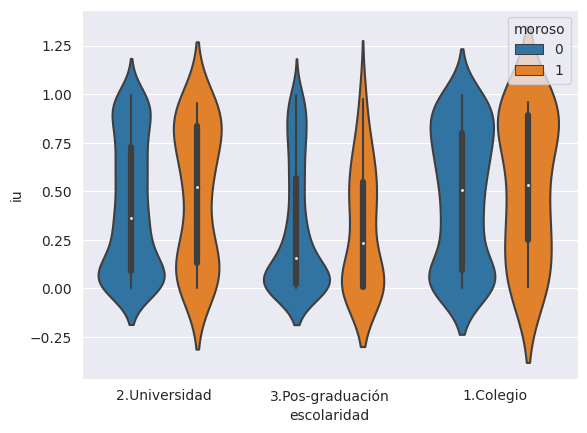

In [45]:
# Gráfica violinplot: las partes que tienen mayor ancho son las que tienen mayor concentración(hay más personas/registros)
sns.violinplot(x='escolaridad', y = 'iu', data = tarjetas, hue='moroso')



*   En pos-graduación la concentración está en valores bajos, muy cercado a 0
*   Los puntos blancos son la media de cada gráfica
*   Para el colegio tiene 2 picos, uno cercano al 0 y otro al 100%



* Los morosos en colegio y universidad tienen mayor concentración en valores cercanos al 0 y 100%

In [46]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046


In [47]:
tarjetas.edad.unique()

array([24, 26, 34, 37, 29, 23, 28, 51, 41, 30, 49, 39, 40, 47, 27, 33, 32,
       54, 58, 22, 31, 25, 42, 45, 57, 56, 44, 35, 53, 43, 38, 63, 36, 52,
       46, 50, 48, 75, 55, 73, 59, 21, 60, 67, 61, 62, 70, 72])

In [48]:
# rangos/cortes
bins = [20, 30, 40 , 50, 100]

# nombres de rangos
nombres = ['20-30', '30-40', '40-50', '50+']

# creando una nueva columna para los rangos
tarjetas['rango_edad'] = pd.cut(tarjetas['edad'], bins, labels = nombres)

In [49]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30


<Axes: xlabel='rango_edad', ylabel='limite'>

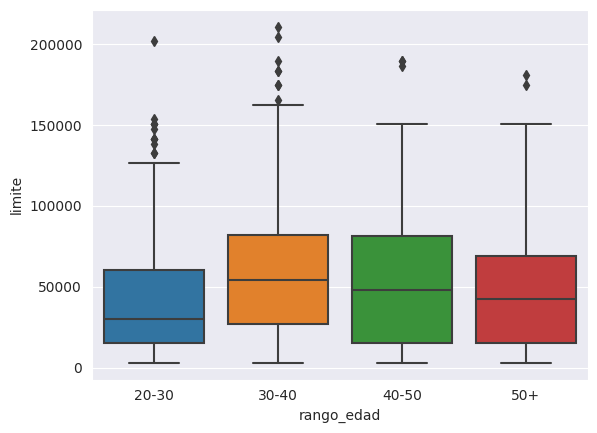

In [50]:
sns.boxplot(x='rango_edad', y='limite', data=tarjetas)

* Las personas entre 30-40 años en promedio tienen el mayor limite de crédito
* Las personas entre 20-30 en promedio tienen el menor limite de crédito
* los puntos negros son outliers(valores sin sentido)

## Análisis de variables numéricas

In [51]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30


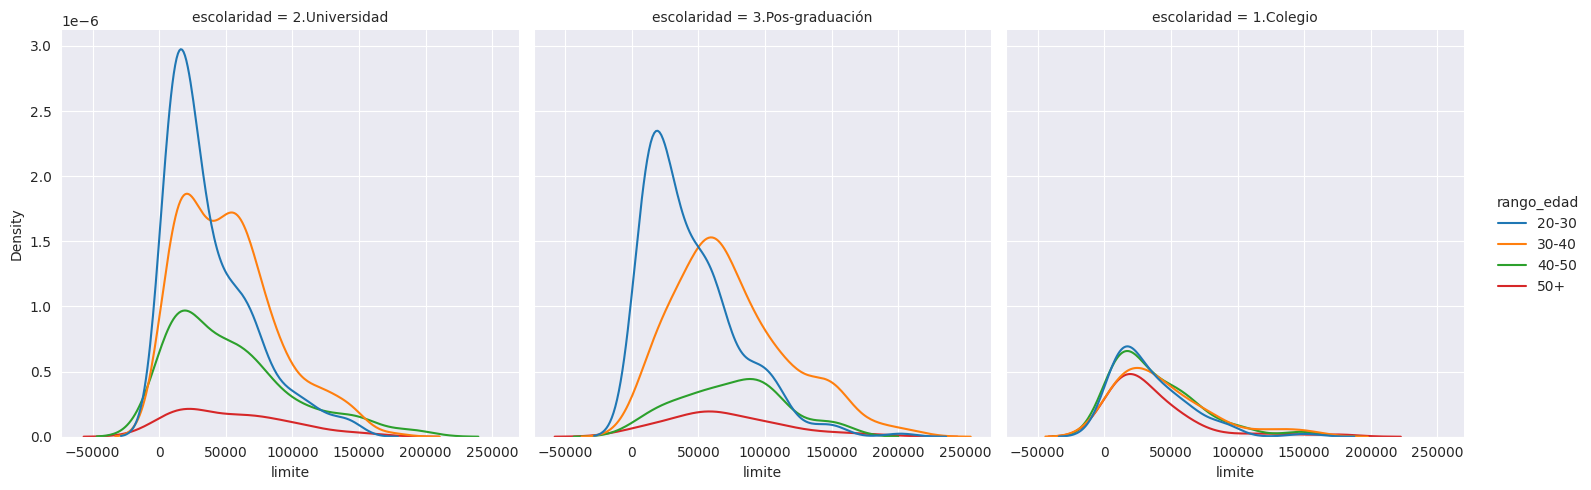

In [57]:
# Gráfica de distribución
sns.displot(data = tarjetas, x = 'limite', col = 'escolaridad', kind='kde', hue = 'rango_edad')

Gráfico de dispersión


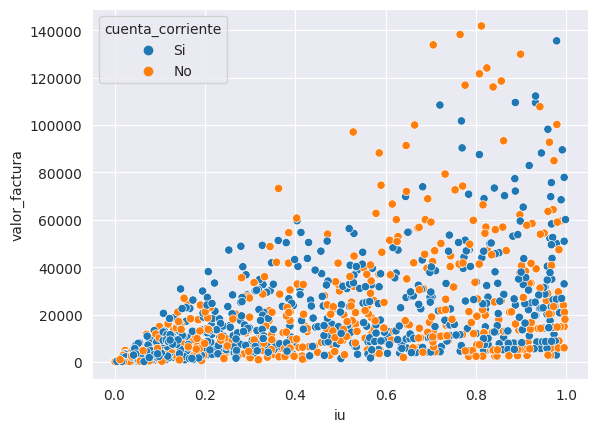

In [60]:
# como se relaciona el valor de la factura con iu? relación directamente proporcional
sns.scatterplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente');

Gráfico de regresión

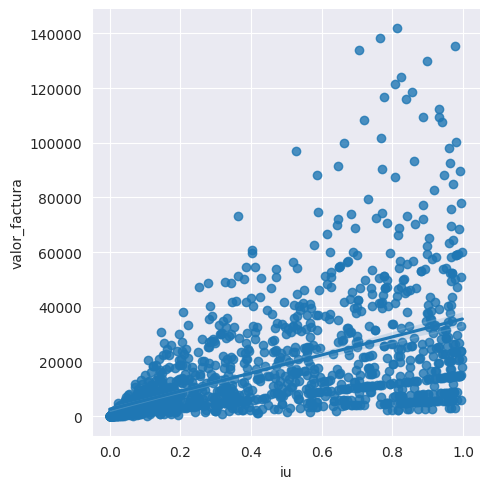

In [61]:
sns.lmplot(x='iu', y='valor_factura', data=tarjetas)
# tiene una linea de tendencia

## Test de hipótesis

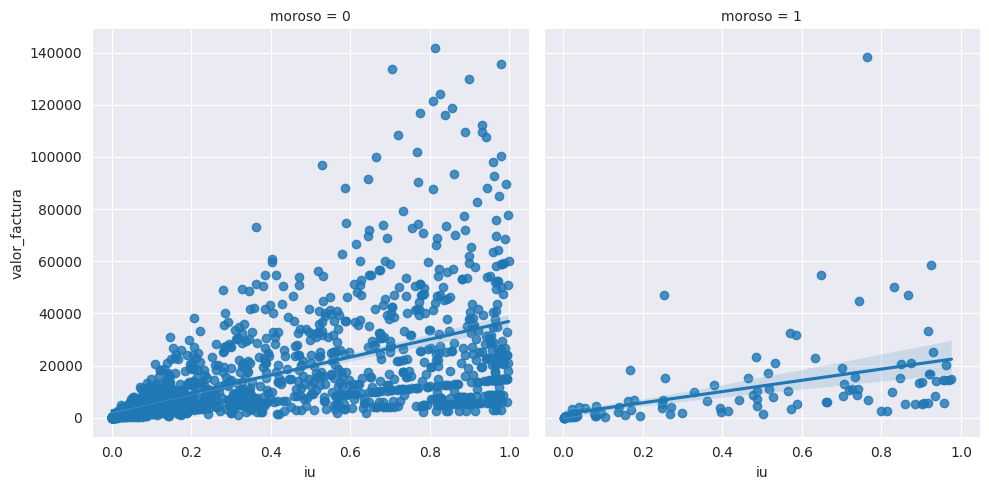

In [63]:
sns.lmplot(x='iu', y='valor_factura', data=tarjetas, col = 'moroso');

In [65]:
# para conocer si la diferencia es significativa del gráfico de arriba
from scipy.stats import ranksums

H<sup>null<sup>

la distribución de los grupos moroso y no moroso es la misma

H<sup>alt<sup>

la distribución de los grupos moroso y no moroso no es la misma

In [66]:
moroso = tarjetas.query("moroso == 1").valor_factura

In [67]:
moroso

0         934.0122
1         519.3975
38      10891.0881
45        330.6078
47       7316.7300
           ...    
1448     1619.0147
1472    17048.2820
1475     4402.0820
1478     1851.1628
1495      295.0780
Name: valor_factura, Length: 117, dtype: float64

In [68]:
no_moroso = tarjetas.query("moroso == 0").valor_factura

In [69]:
no_moroso

2         4223.5297
3        14522.9563
4       124060.1253
5          114.4180
6         4244.3056
           ...     
1494     32698.2556
1496     23637.8555
1497       962.9178
1498       864.7592
1499     97022.8508
Name: valor_factura, Length: 1383, dtype: float64

In [71]:
# diferencia de su distribución (entre los grupos moroso y no moroso) es significativa?
resultado = ranksums(moroso, no_moroso)

la hipótesis altenativa H<sup>alt</sup> es aceptada porque pvalue es menor a 0.05 (5%)

In [72]:
print("El pvalue de nuestro resultado es {}".format(resultado.pvalue))

El pvalue de nuestro resultado es 0.010391243081223555


## Jointplot
Gráfico parecido al de dispersión, pero ofrece mayor información como un histrograma

In [73]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30


relacionando edad con limite

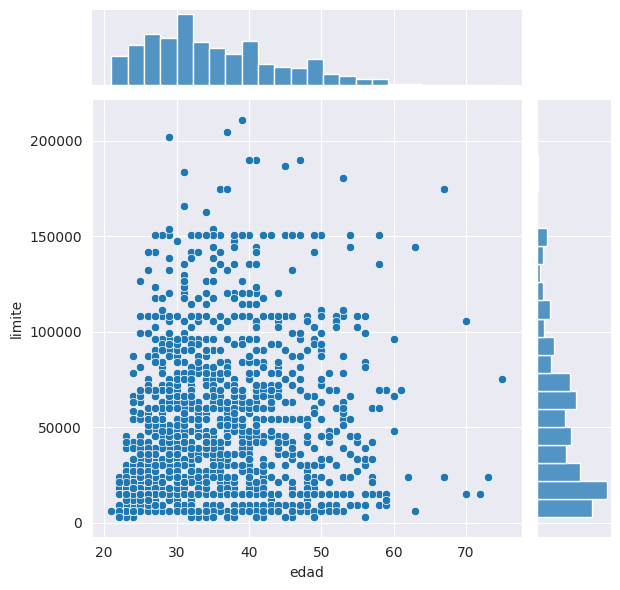

In [74]:
sns.jointplot(x='edad', y='limite', data=tarjetas)
# el histograma superior es de edad y el de la derecha es del limite

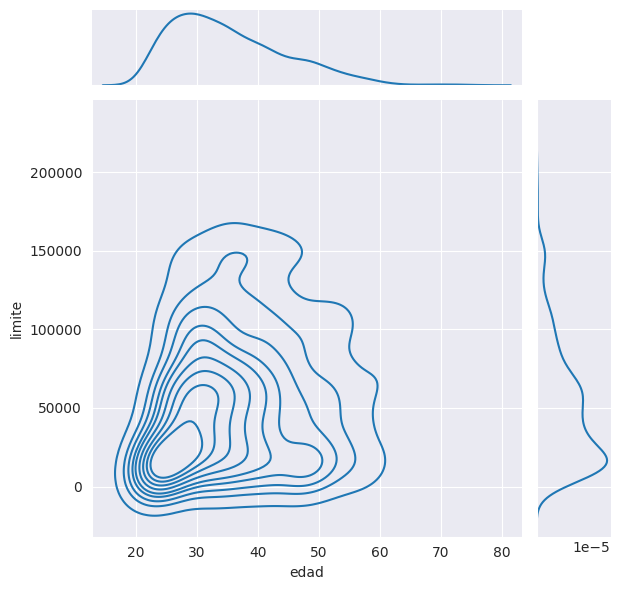

In [75]:
sns.jointplot(x='edad', y='limite', data=tarjetas, kind='kde')
# lineas más juntas = la concentración es mayor

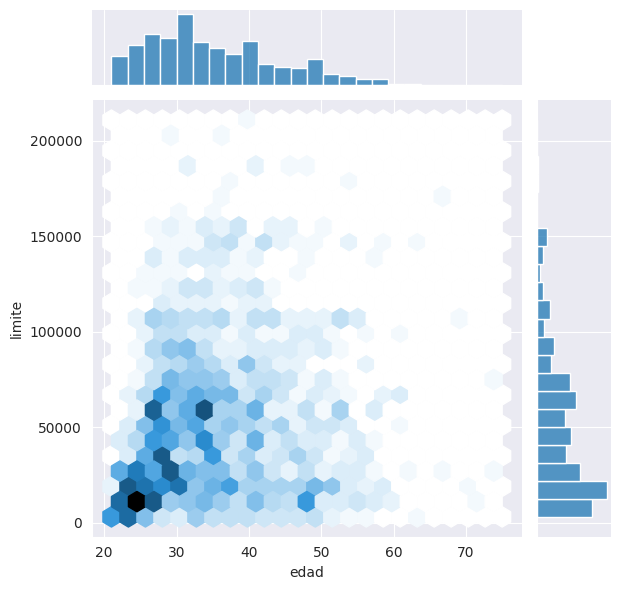

In [77]:
sns.jointplot(x='edad', y='limite', data=tarjetas, kind='hex')
# color más fuerte = mayor concentración

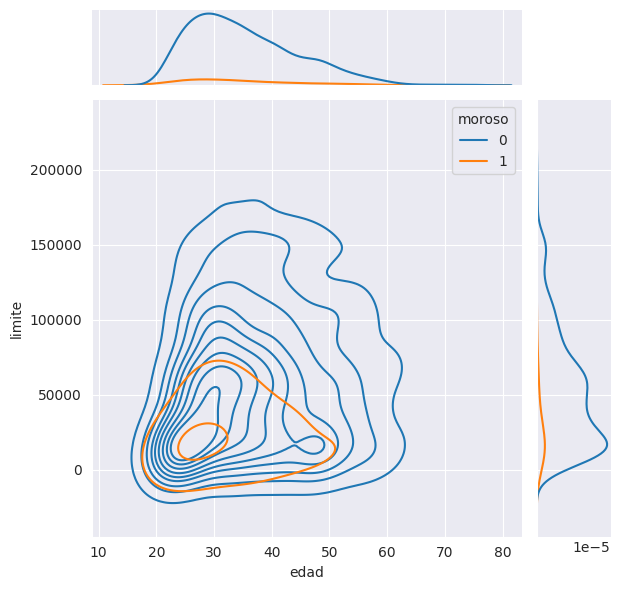

In [78]:
# distribución de morosos y no morosos en la edad y limite
sns.jointplot(x='edad', y='limite', data=tarjetas, kind='kde', hue='moroso')

la mayor concentración de morosos se encuentra entre 20 y 30 años, y está más dispersa entre 20 y 50

## Pairplot
análisis rápido de las variables numéricas de forma visual

In [79]:
tarjetas.describe()

,limite,edad,valor_factura,valor_pago,moroso,iu
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000,0.388237
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261,0.341923
min,3011.000000,21.000000,27.701200,0.000000,0.000000,0.000188
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000,0.049209
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000,0.308976
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000,0.704090
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000,0.998010


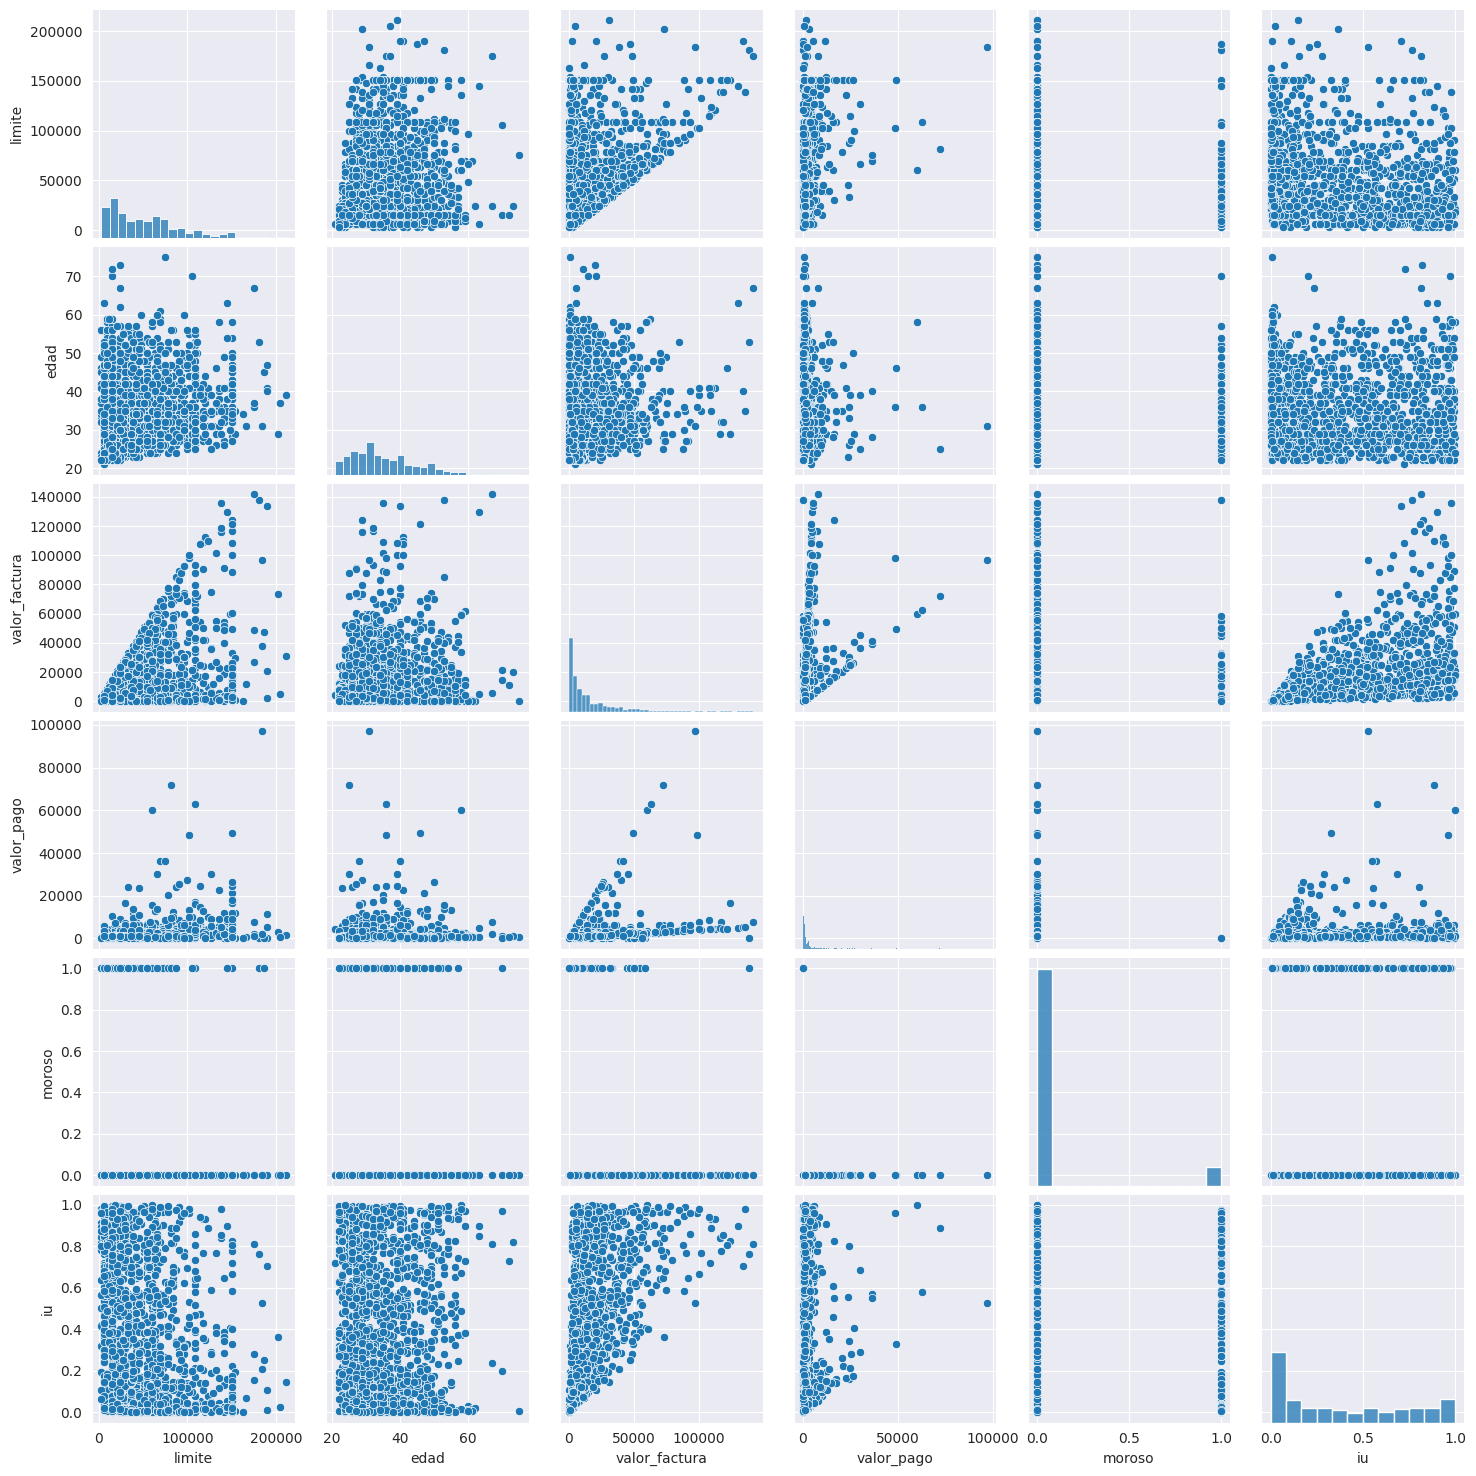

In [80]:
sns.pairplot(data=tarjetas)



*   en la línea diagonal tenemos el histograma cuando la variable se relaciona con ella misma
*   Elemento de lista



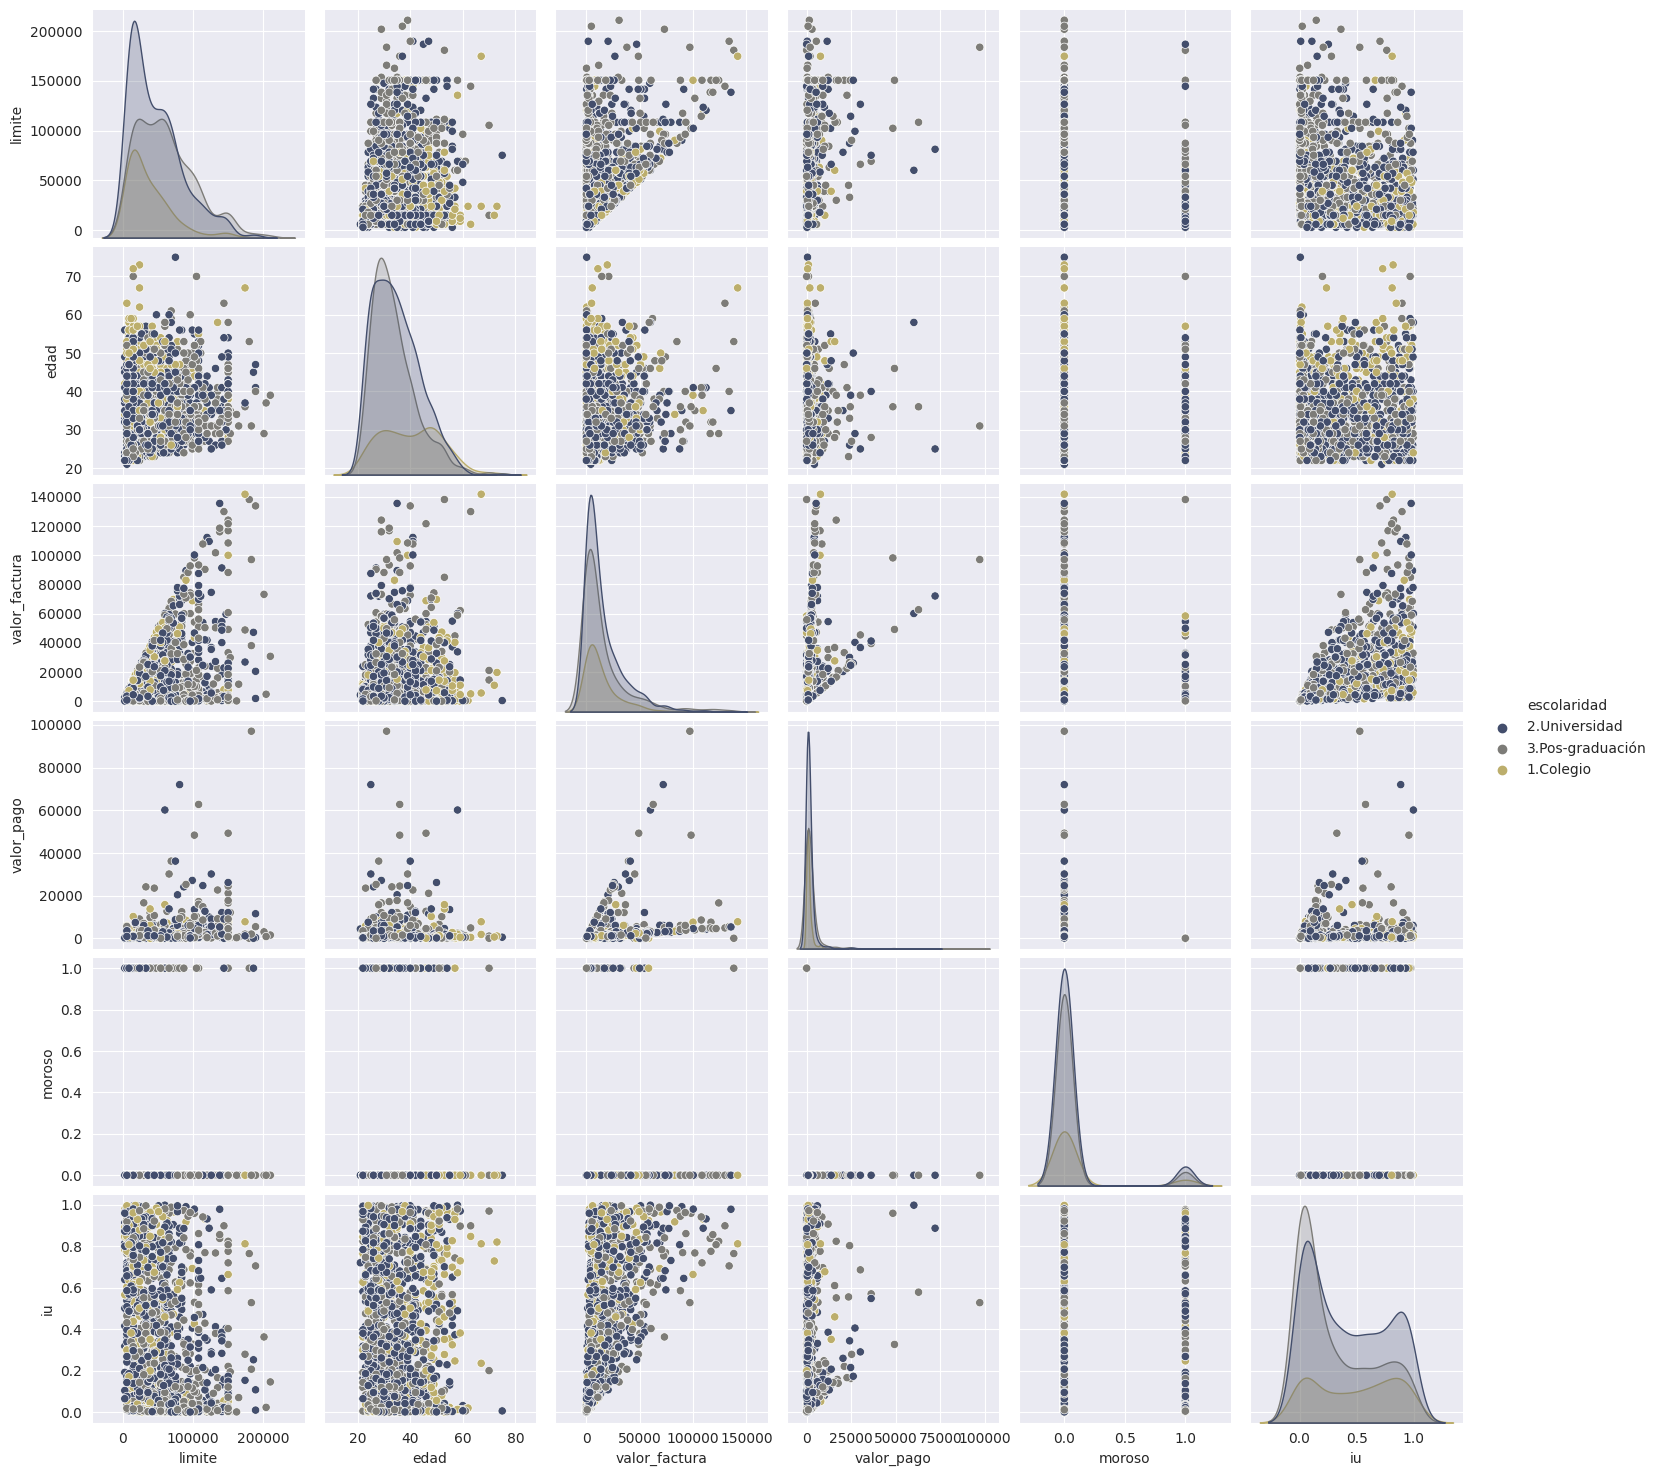

In [82]:
sns.pairplot(data=tarjetas, hue = 'escolaridad', palette = 'cividis')